In [1]:
import pandas as pd
import numpy as np

### Have taken only 10,000 sample records
df = pd.read_csv('stats_assignment.csv')

In [2]:
df.columns

Index(['call_id', 'call_yr', 'call_mo', 'call_dy', 'call_hr', 'call_mn',
       'agent_id', 'node', 'callbegin_dttm', 'callend_dttm',
       'skillgroupperipheralnumber', 'memberid', 'memberdob', 'memberstate',
       'group_policy', 'callertype', 'producttype', 'ring_time', 'talk_time',
       'hold_time', 'totalcalltime', 'queuetime', 'distinctredirattempt_cnt'],
      dtype='object')

In [4]:
df.dtypes

call_id                       object
call_yr                       object
call_mo                        int64
call_dy                        int64
call_hr                        int64
call_mn                        int64
agent_id                      object
node                           int64
callbegin_dttm                object
callend_dttm                  object
skillgroupperipheralnumber    object
memberid                      object
memberdob                     object
memberstate                   object
group_policy                  object
callertype                    object
producttype                   object
ring_time                      int64
talk_time                     object
hold_time                     object
totalcalltime                 object
queuetime                      int64
distinctredirattempt_cnt       int64
dtype: object

In [5]:
df['totalcalltime'] = df['totalcalltime'].apply(pd.to_numeric, args=('coerce',))

In [24]:
################## Total Call Time #########################
header = []
value = []
col = 'totalcalltime'
## Mean
header.append('Mean')
value.append(df[col].mean())

## Median
header.append('Median')
value.append(df[col].median())

## Mode
header.append('Mode')
value.append(df[col].mode())

## Percentile Distribution
header.append('25th Percentile')
value.append(np.array(df[col].quantile([0.25]))[0])

header.append('50th Percentile')
value.append(np.array(df[col].quantile([0.5]))[0])

header.append('75th Percentile')
value.append(np.array(df[col].quantile([0.75]))[0])

## Standard Deviation
header.append('Standard Deviation')
value.append(df[col].std())

TotalCallTime_stats = pd.DataFrame(value, columns = ['value'], index = header)
TotalCallTime_stats

,value
Mean,267.886
Median,204
Mode,0 15.0 dtype: float64
25th Percentile,93.75
50th Percentile,204
75th Percentile,381
Standard Deviation,226.739


C:\Users\nnair101\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\nnair101\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\nnair101\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\nnair101\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\nnair101\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


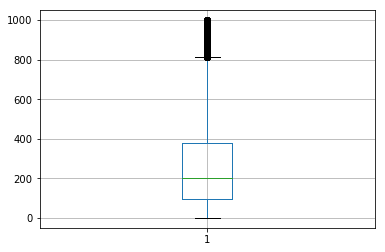

In [27]:
import matplotlib.pyplot as plt

plt.boxplot(df["totalcalltime"])
plt.show()

In [29]:
################## Queue Time #########################
header = []
value = []
col = 'queuetime'
## Mean
header.append('Mean')
value.append(df[col].mean())

## Median
header.append('Median')
value.append(df[col].median())

## Mode
header.append('Mode')
value.append(df[col].mode())

## Percentile Distribution
header.append('25th Percentile')
value.append(np.array(df[col].quantile([0.25]))[0])

header.append('50th Percentile')
value.append(np.array(df[col].quantile([0.5]))[0])

header.append('75th Percentile')
value.append(np.array(df[col].quantile([0.75]))[0])

header.append('90th Percentile')
value.append(np.array(df[col].quantile([0.90]))[0])

## Standard Deviation
header.append('Standard Deviation')
value.append(df[col].std())

QueueTime_stats = pd.DataFrame(value, columns = ['value'], index = header)
QueueTime_stats

,value
Mean,16.7503
Median,0
Mode,0 0 dtype: int64
25th Percentile,0
50th Percentile,0
75th Percentile,0
90th Percentile,64
Standard Deviation,46.3098


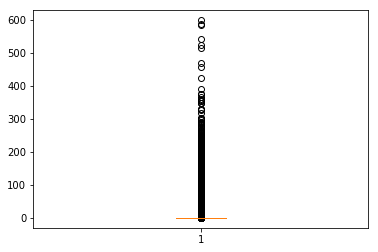

In [30]:
import matplotlib.pyplot as plt

plt.boxplot(df["queuetime"])
plt.show()

In [31]:
################## Queue Time #########################
header = []
value = []
col = 'distinctredirattempt_cnt'
## Mean
header.append('Mean')
value.append(df[col].mean())

## Median
header.append('Median')
value.append(df[col].median())

## Mode
header.append('Mode')
value.append(df[col].mode())

## Percentile Distribution
header.append('25th Percentile')
value.append(np.array(df[col].quantile([0.25]))[0])

header.append('50th Percentile')
value.append(np.array(df[col].quantile([0.5]))[0])

header.append('75th Percentile')
value.append(np.array(df[col].quantile([0.75]))[0])

header.append('90th Percentile')
value.append(np.array(df[col].quantile([0.90]))[0])

## Standard Deviation
header.append('Standard Deviation')
value.append(df[col].std())

QueueTime_stats = pd.DataFrame(value, columns = ['value'], index = header)
QueueTime_stats

,value
Mean,2.189
Median,2
Mode,0 2 dtype: int64
25th Percentile,2
50th Percentile,2
75th Percentile,2
90th Percentile,3
Standard Deviation,0.646004


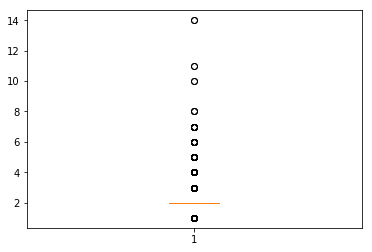

In [32]:
import matplotlib.pyplot as plt

plt.boxplot(df["distinctredirattempt_cnt"])
plt.show()

In [39]:
calls_by_members = pd.DataFrame(df.groupby('memberid')['call_id'].nunique())
df = calls_by_members.loc[( calls_by_members['call_id'] ) > 1]

In [40]:
################## Repeat Calls #########################
# Assumption- If any member has called more than once (count distinct of call id >1) is considered as repeat call

header = []
value = []
col = 'call_id'
## Mean
header.append('Mean')
value.append(df[col].mean())

## Median
header.append('Median')
value.append(df[col].median())

## Mode
header.append('Mode')
value.append(df[col].mode())

## Percentile Distribution
header.append('25th Percentile')
value.append(np.array(df[col].quantile([0.25]))[0])

header.append('50th Percentile')
value.append(np.array(df[col].quantile([0.5]))[0])

header.append('75th Percentile')
value.append(np.array(df[col].quantile([0.75]))[0])

header.append('90th Percentile')
value.append(np.array(df[col].quantile([0.90]))[0])

## Standard Deviation
header.append('Standard Deviation')
value.append(df[col].std())

RepeatCall_stats = pd.DataFrame(value, columns = ['value'], index = header)
RepeatCall_stats

,value
Mean,174.971
Median,2
Mode,0 2 dtype: int64
25th Percentile,2
50th Percentile,2
75th Percentile,2
90th Percentile,98.2
Standard Deviation,654.695


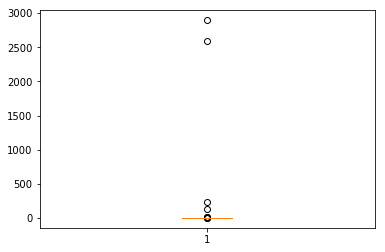

In [41]:
import matplotlib.pyplot as plt

plt.boxplot(df["call_id"])
plt.show()